In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

## Linear Regression



### Prediction 

Given a dataset of points $(x_i, y_i)$, we predict $\hat{y}_i$ for each input $x_i$ using the equation of a straight line:
$$
\hat{y}_i = m x_i + b
$$
The goal is to find the specific values for the slope ($m$) and intercept ($b$) that create a line minimizing the cost function. 

### Cost Function

To measure how well our line fits the data, we use the **Mean Squared Error (MSE)** cost function. This is what we want to minimize. Let's call it $J(m,b)$. It's the average of the squared differences between the actual values ($y_i$) and our predicted values ($\hat{y}_i$).
$$
J(m,b) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y_i})^2
$$
$$
J(m,b) = \frac{1}{N} \sum_{i=1}^N (y_i - (m x_i + b))^2 
$$
where $N$ is the number of data points.

### Finding the "Best" Line

The "best" line minimizes the MSE. In calculus, you find the minimum of a function by taking its derivative, setting it to zero, and solving. Since our cost function has two variables ($m$ and $b$), we'll need to take a partial derivative with respect to each one.

- For $m$:
      $$
      \frac{\partial J}{\partial m} = -\frac{2}{N} \sum_{i=1}^N x_i (y_i - (m x_i + b)) = 0
      $$
      $$
    \sum_{i=1}^N x_iy_i - m\sum_{i=1}^N x^2_i - b\sum_{i=1}^N x_i = 0  \tag{1}
      $$
- For $b$:
      $$
      \frac{\partial J}{\partial b} = -\frac{2}{N} \sum_{i=1}^N (y_i - (m x_i + b)) = 0
      $$
      $$
      \sum_{i=1}^N y_i - m \sum_{i=1}^N x_i - Nb = 0  \tag{2}
      $$
We can rewrite the system of equations (1) and (2) in the form $A \vec{x} = \vec{b}$ and solve it using Gaussian Elimination we learned previously:

$$
\begin{pmatrix}
\sum x_i^2 & \sum x_i \\
\sum x_i & N
\end{pmatrix}
\begin{pmatrix}
m \\
b
\end{pmatrix}
=
\begin{pmatrix}
\sum x_i y_i \\
\sum y_i
\end{pmatrix}
$$




1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [ ]:
data_x, data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

In [ ]:
plt.plot(data_x, data_y, '.')

3) Find the best slope and the best intercept. Plot the line along with the data points.


In practice, we use the `scikit-learn` library to perform linear regression efficiently. It handles the fitting process and provides easy access to the slope and intercept. See the example below for how to use it:

- Reshape your input data if necessary (scikit-learn expects a 2D array for features).
- Fit the model using `model.fit(data_x_2d, data_y)`.
- Access the slope with `model.coef_` and the intercept with `model.intercept_`.

This approach is widely used in real-world data science and machine learning tasks.

## Generalization

The technique we learn above does not limit you to just a straight line model. Let us use it for a more general problem. For fitting the parabola, we can derive $A$ and $\vec{b}$ using calculus as we did previously. Here are the results 

$$
\begin{pmatrix}
\sum x_i^4 &\sum x_i^3 & \sum x_2 \\
\sum x_i^3 &\sum x_i^2 & \sum x_i \\
\sum x_i^2 &\sum x_i & N
\end{pmatrix}
\begin{pmatrix}
a_1 \\
a_2 \\
a_3
\end{pmatrix}
=
\begin{pmatrix}
\sum x^2_i y_i \\
\sum x_i y_i \\
\sum y_i
\end{pmatrix}
$$

where our parabola is $f(x) = a_1x^2+a_2x+a_3$. (You may see the pattern of $A$ and $b$, so you can generalize for cubic equation and so on)

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

2) Plot the best fitted parabola and plot it along with the data points.

## Higher Dimension

Also, there is no need to stop at 2 dimension.

In [ ]:
np.random.seed(1234567)
def gen_child_height_sample(n_data=100):
    father_height = np.random.randn(n_data)*20 + 170
    mother_height = np.random.randn(n_data)*20 + 160
    # just pretend you didn't see this
    child_height = 0.8*mother_height + 0.2*father_height + 5 + np.random.randn(n_data)*10
    return father_height, mother_height, child_height

father_height, mother_height, child_height = gen_child_height_sample()

We have a reason to believe that a child height is a linear combination of mother's and father's height.

$$
h_{child} = c_{mom} \times h_{mom} + c_{dad} \times h_{dad} + c
$$

1.) Plot mother_height vs child_height and father_height vs child_height.

2.) Find appropriate $c_{mom}$ and $c_{dad}$

3) Now that you can't really plot the line on top of distribution to check the answer anymore since you have more than 2 dimensions.

Try plot $h_{child, predicted}$ vs $h_{child, data}$. What do you expect to see and did you get what you expect?

In practice, this is also used to predict the housing price.

## Even More generalization. Power Law.

Most of physics formula comes in the form of

$Y = K \times A^\alpha B^\beta C^\gamma$

Ex:
- $ F = ma$
- $ K = \frac{1}{2} m v^2$
- $ c = \frac{1}{\sqrt{\mu_0, \epsilon_0}}$

1) How do we turn power law in to linear relation?

2) Turn this in to a linear equation.

3) If we still have time.

Pretend that you are bad at physics and don't know how to calculate kinetic energy from velocity.

Your guess is

$$
K = cv^\alpha
$$

find $c$ and $\alpha$

In [3]:
np.random.seed(7383672)
def gen_kinetic(n_data=100):
    v = np.random.rand(n_data)*10
    m = 3.33
    k = 1/2*m*v**2*(1+np.random.randn(n_data)*0.05)
    v 
    return v, k

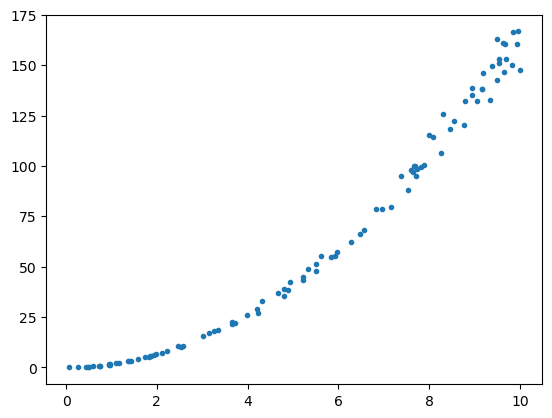

In [4]:
v, k = gen_kinetic()
plt.plot(v, k, '.')